****
# Introduction #
****
**This notebook goal is to successfully recognize hand written digits**

**If you found this notebook helpful or liked it kindly Upvote :)**

In [1]:
# importing
import pandas as pd
import numpy as np

****
# Reading and Displaying Data #
****

In [2]:
# Reading data
tr=pd.read_csv(r'/kaggle/input/digit-recognizer/train.csv')
te=pd.read_csv(r'/kaggle/input/digit-recognizer/test.csv')

In [3]:
tr

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
te

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


****
# Data Preprocessing #
****

In [5]:
# Splitting the datasets into features and labels (Target variable)

x=tr.iloc[:,1:]
y=tr.iloc[:,:1]
print(x.shape,y.shape)

(42000, 784) (42000, 1)


In [6]:
# Reshaping the features to push it through our CNN Model
# We need to first convert it to 1D, for that we use to_numpy() function
# We need to reshape it to 28 X 28 grayscale image after converting it to 1 dimensional array

x=x.to_numpy().reshape(-1,28,28,1)
te=te.to_numpy().reshape(-1,28,28,1)
print(x.shape,te.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [7]:
# We have our features (Pixels) shape in our desired format
# We need to one hot encode our Label column (Target variable)
# To apply one hot encoding we need our label shape to be (n,) but currently our Label column shape is (n,1) so we convert it by using squeeze() funciton

yt=pd.get_dummies(y.squeeze())
y=pd.concat([y,yt],axis=1)
y.drop(columns='label',inplace=True,axis=1)
print(y.shape)

(42000, 10)


****
# Data Preparation #
****

In [8]:
# importing
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the dataset into training set (80 %) and testing set (20 %)
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.2,random_state=20)

In [10]:
# Final Shapes
print('Training Features Shape: ',x_t.shape)
print('Training Target Shape: ',y_t.shape)
print('Validation Features Shape: ',x_te.shape)
print('Validation Target Shape: ',y_te.shape)
print('Testing Features Shape: ',te.shape)

Training Features Shape:  (33600, 28, 28, 1)
Training Target Shape:  (33600, 10)
Validation Features Shape:  (8400, 28, 28, 1)
Validation Target Shape:  (8400, 10)
Testing Features Shape:  (28000, 28, 28, 1)


****
# Convolutional Neural Network #
****

In [11]:
# importing

import keras as k
from keras import layers,models
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [12]:
c=EarlyStopping(monitor='val_accuracy',patience=7,restore_best_weights=True)
r=ReduceLROnPlateau(monitor='val_accuracy',patience=5,factor=0.001)

In [13]:
mod=models.Sequential()

# First CNN Layer

mod.add(layers.Conv2D(512,(3,3),padding='same',input_shape=(28,28,1)))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))

# Second CNN Layer

mod.add(layers.Conv2D(256,(3,3),padding='same',input_shape=(28,28,1)))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.Dropout(0.1))

# Third CNN Layer

mod.add(layers.Conv2D(128,(3,3),padding='same',input_shape=(28,28,1)))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.1))

# Fourth CNN Layer

mod.add(layers.Conv2D(64,(3,3),padding='same',input_shape=(28,28,1)))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())

# Fifth CNN Layer

mod.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(28,28,1)))
mod.add(layers.BatchNormalization())
mod.add(layers.Activation('relu'))
mod.add(layers.MaxPooling2D())
mod.add(layers.Dropout(0.2))

# Flattening

mod.add(layers.Flatten())

# First Fully Connected Layer

mod.add(layers.Dense(512,activation='relu'))
mod.add(layers.BatchNormalization())

# Second Fully Connected Layer

mod.add(layers.Dense(256,activation='relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.Dropout(0.1))

# Third Fully Connected Layer

mod.add(layers.Dense(64,activation='relu'))
mod.add(layers.BatchNormalization())
mod.add(layers.Dropout(0.1))

# Output Fully Connected Layer

mod.add(layers.Dense(10,activation='softmax'))
mod.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 512)    │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,876,010 (7.16 MB)

 Trainable params: 1,872,362 (7.14 MB)

 Non-trainable params: 3,648 (14.25 KB)

In [14]:
opt=k.optimizers.Adam(learning_rate=0.005)
mod.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
modh=mod.fit(x_t,y_t,epochs=200,validation_data=(x_te,y_te),callbacks=[c,r],batch_size=64)

Epoch 1/200


I0000 00:00:1730438190.902793    2562 service.cc:145] XLA service 0x7ccf9c00ca50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730438190.902839    2562 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  5/525 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.1523 - loss: 2.8455 

I0000 00:00:1730438203.752653    2562 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


525/525 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.8566 - loss: 0.4603 - val_accuracy: 0.9738 - val_loss: 0.0965 - learning_rate: 0.0050
Epoch 2/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9708 - loss: 0.0966 - val_accuracy: 0.9661 - val_loss: 0.1141 - learning_rate: 0.0050
Epoch 3/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9786 - loss: 0.0679 - val_accuracy: 0.9732 - val_loss: 0.0914 - learning_rate: 0.0050
Epoch 4/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9790 - loss: 0.0681 - val_accuracy: 0.9858 - val_loss: 0.0475 - learning_rate: 0.0050
Epoch 5/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9825 - loss: 0.0585 - val_accuracy: 0.9823 - val_loss: 0.0614 - learning_rate: 0.0050
Epoch 6/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9870 - loss: 0.0461 - val_accuracy: 0.9852 - val_loss: 0.0558 - learning_rate: 0.0050
Epoch 7/200
525/525 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9863 - loss: 

****
# Evaluation Metrics #
****

In [16]:
# importing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pred_tr=mod.predict(x_t)
pred_val=mod.predict(x_te)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [18]:
pred_tr=np.argmax(pred_tr,axis=1)
pred_val=np.argmax(pred_val,axis=1)
y_t=np.argmax(y_t,axis=1)
y_te=np.argmax(y_te,axis=1)

In [21]:
print('Training Evaluation Metrics:\n\n')
print('Classification Report:\n',classification_report(y_t,pred_tr))
print('Accuracy:\n',accuracy_score(y_t,pred_tr))
print('Precision:\n',precision_score(y_t,pred_tr,average='micro'))
print('Recall:\n',recall_score(y_t,pred_tr,average='micro'))
print('F1 Score:\n',f1_score(y_t,pred_tr,average='micro'))
print('\n\n')
print('Testing Evaluation Metrics:\n\n')
print('Classification Report:\n',classification_report(y_te,pred_val))
print('Accuracy:\n',accuracy_score(y_te,pred_val))
print('Precision:\n',precision_score(y_te,pred_val,average='micro'))
print('Recall:\n',recall_score(y_te,pred_val,average='micro'))
print('F1 Score:\n',f1_score(y_te,pred_val,average='micro'))

Training Evaluation Metrics:


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3315
           1       1.00      1.00      1.00      3710
           2       1.00      1.00      1.00      3358
           3       1.00      1.00      1.00      3455
           4       1.00      1.00      1.00      3313
           5       1.00      1.00      1.00      3020
           6       1.00      1.00      1.00      3329
           7       1.00      1.00      1.00      3548
           8       1.00      1.00      1.00      3240
           9       1.00      1.00      1.00      3312

    accuracy                           1.00     33600
   macro avg       1.00      1.00      1.00     33600
weighted avg       1.00      1.00      1.00     33600

Accuracy:
 0.9985416666666667
Precision:
 0.9985416666666667
Recall:
 0.9985416666666667
F1 Score:
 0.9985416666666667



Testing Evaluation Metrics:


Classification Report:
           

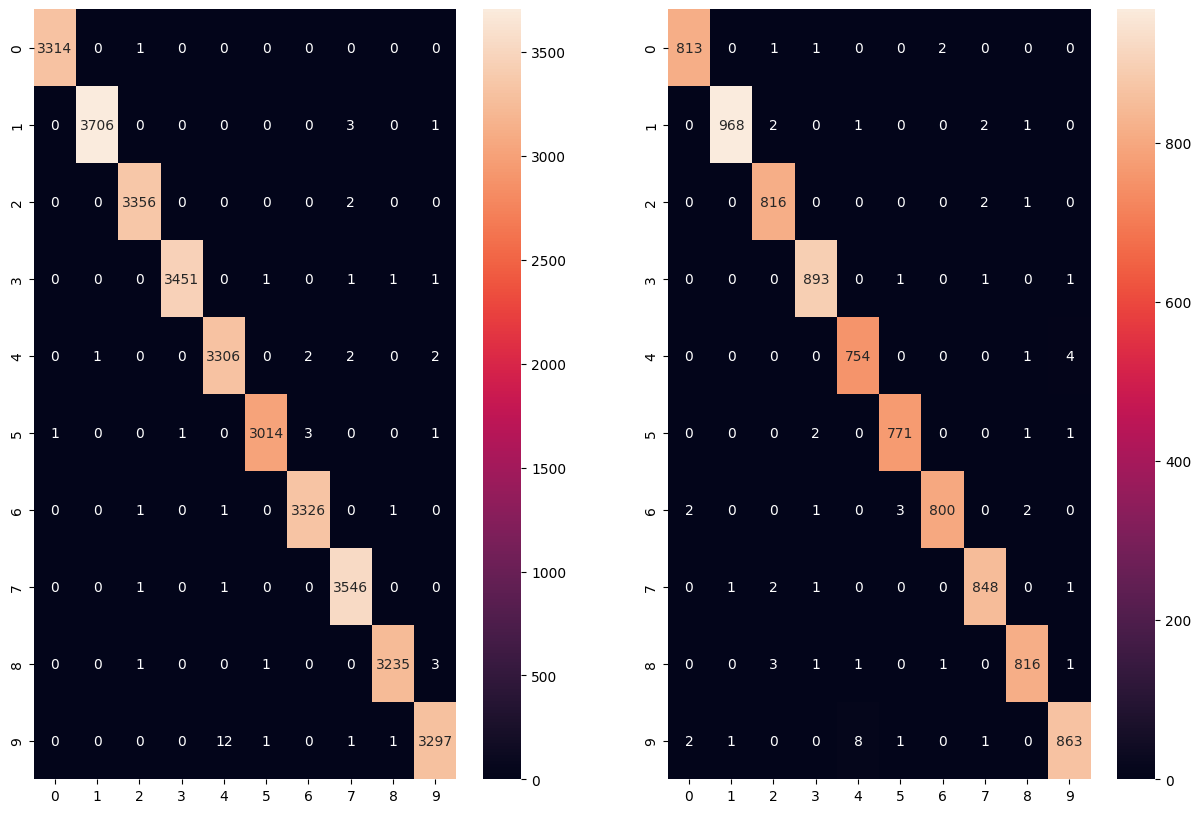

In [22]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_t,pred_tr),ax=ax[0],annot=True,fmt='d')
sns.heatmap(confusion_matrix(y_te,pred_val),ax=ax[1],annot=True,fmt='d')
plt.show()

****
# Submission #
****

In [23]:
# Predicting
pred=mod.predict(te)
pred=np.argmax(pred,axis=1)
pred=pd.Series(pred,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step


In [32]:
# Submission File
res = pd.concat([pd.Series(range(1, len(pred) + 1), name="ImageId"), pred], axis=1)
res.to_csv("digit.csv", index=False)

****
# Feedback and Suggestions #
****
**Kindly Provide feedback and suggestions to improve this notebook**

**Kindly Upvote if you found this notebook helpful or if you liked it**